# 나이브베이즈 분류

> 나이브 베이즈 (Naive Bayes)

나이브베이즈 모델은 대체로 매우 높은 차원의 데이터세트에 적합한 상당히 빠르고 간단한 분류 알고리즘을 가지고 있다. 이 알고리즘들은 매우 빠르게 조정 가능한 모수가 매우 적기 때문에 분류 문제에서 빠즈로 간편한 기준선으로 쓰기에 매우 유용하다. 이번 절에서는 나이브 베이즈 분류기의 작동 방식을 직관적으로 설명하는 데 초점을 맞출 것이며 실제로 몇몇 데이터 세트에 그것들을 적용하는 예제를 살펴보자.



## 베이즈 분류

나이브 베이즈 분류기는 베이즈 분류법을 기반으로 만들어졌다.

베이즈 분류법은 통계량의 *조건부 확률* 사이의 관계를 나타내는 방정식인 베이즈 정리를 기반으로 한다. 베이즈 분류에서는 관측된 특징(feature)이 주어졌을 때 레이블(label)의 확률을 구하는 데 관심이 있으며 이를 $P(L|features)$로 쓸 수 있다. 베이즈 정리는 이를 표현하는 방법을 더 직접적으로 계산할 수 있는 양의 관점에서 알려준다.

$$ P(L|features) = \frac{P(features|L) P(L)}{P(features)} $$

$L_1$과 $L_2$라는 두 레이블 사이에서 결정하려고 하는 경우, 결정을 내리는 한가지 방법은 각 레이블의 사후 롹률의 비율을 계산하는 것이다.

$$ \frac{P(L_1|features)}{P(L_2|features)} = \frac{P(features|L_1) P(L_1)}{P(features|L_2) P(L_2)}  $$

이제 필요한 것은 각 레이블에 대한 $P(features|L_i)$를 계산할 수 있는 모델이다. 그러한 모델을 **생성 모델**(generative model)이라고 하는데 그것이 데이터를 생성하는 가설적인 랜덤 프로세스를 기술하기 때문이다. 각 레이블에 대한 이 생성 모델을 지정하는 것이 그러한 베이즈 분류기를 훈련시키는 주요 부분이다. 그러한 일반적인 형태의 훈련 단계는 매우 어려운 작업이지만 이 모델의 형태에 단순화된 가정들을 사용하믕로써 작업을 더 간단하게 만들 수 있다. 

이때문에 '나이브'라는 표현식이 쓰인다. 각 레이블의 생성 모델에 대해 매우 순진하게(naive) 가정하면 각 클래스에 대한 생성 모델을 대략 근사하게 찾을 수 있고 그에 따라 베이즈 분류를 적용할 수 있다. 나이브 베이즈 분류기의 유형은 데이터에 대한 여러가지 순진한 가정에 따라 달라진다.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## 가우스 나이브 베이즈

가장 이해가기 쉬운 나이브 베이즈 분류 방식은 아마 가우스 나이브 베이즈 (Gaussian naive Bayes)일 것이다. 이 분류기는 각 레이블의 데이터가 간단한 가우스 분포로부터 추출된다고 가정한다. 다음과 같은 데이터가 있다고 생각해보자.

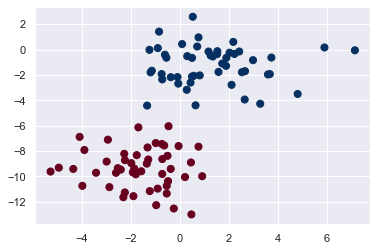

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

간단한 모델을 만드는 가장 빠른 방법은 데이터가 차원 사이에 공분산이 없는 가우스 분포를 따른다고 가정하는 것이다. 이 모델은 단순히 각 레이블 내 점의 평균과 표준편차를 구함으로써 적합할 수 있다. 단순히 그러한 분포를 정희하기만 하면 된다.

(시각화한 가우스 나이브 베이즈 모델)

여기서 타원은 타원의 중심으로 갈수록 확률이 더 커지는 각 레이블에 대한 가우스 생성 모델을 나타낸다. 각 클래스에 대해 이 생성 모델이 준비되면 모든 데이터 점에 대한 우도(likelihood) $P(features|L_1)$를 계산할 수 있는 간단한 방법이 생긴 셈이니 신속하게 사후 확률을 계산해서 주어진 점에 대해 어느 레이블이 가장 확률이 높은지 결정할 수 있다.

이 절차는 Scikit-learn의 `sklearn.naive_bayes.GaussianNB` 추정기에 구현되어 있다.

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

이제 새로운 데이터를 만들어서 레이블을 예측해보자.

In [6]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

이 새로운 데이터를 플로팅하면 결정 경계(decision boundary)가 어디에 있는지 대략 알 수 있다.

(-5.890554373486014,
 7.777566725032841,
 -13.775943665162341,
 3.3634536696825847)

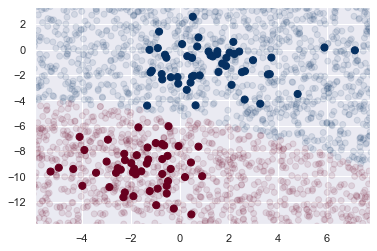

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, cmap='RdBu', alpha=0.1)
plt.axis(lim)

분류에서 살짝 굽은 경계가 보인다. 일반적으로 가우스 나이브 베이즈의 경계는 2차식의 형태를 띈다.

베이즈 형식주의의 좋은 점은 자연스럽게 확률적인 분류가 가능하다는 것이며, `predict_porba` 메서드를 사용해 그 확률을 계산할 수 있다.

In [11]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

두 열은 각각 첫번째와 두번째 레이블의 사후 확률을 제공한다. 분류 작업의 불확실성의 추정치를 알고싶다면 이와 같은 베이즈 방식이 유용할 수 있다.

물론 최종 분류의 수준은 모델을 만들 때 사용했던 모델 가정 수준에만 머문다. 가우스 나이브 베이즈가 대체로 아주 좋은 결과를 만들어내지 못하는 이유가 여기에 있다. 그래도 여전히 많은 경우 이러한 가정이 가우스 나이브 베이즈의 사용을 막을 만큼 해롭지는 않다.